In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


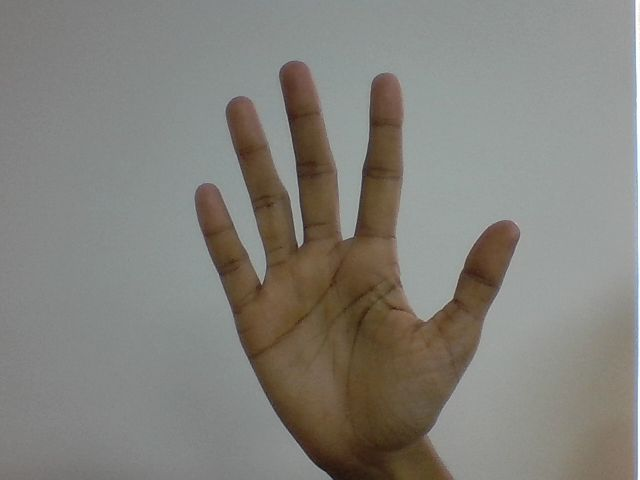

In [13]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [14]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model = load_model('/content/drive/MyDrive/ASLSign2/SinhalaSign Language/final_model_trained_on_all_MobileNet.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step


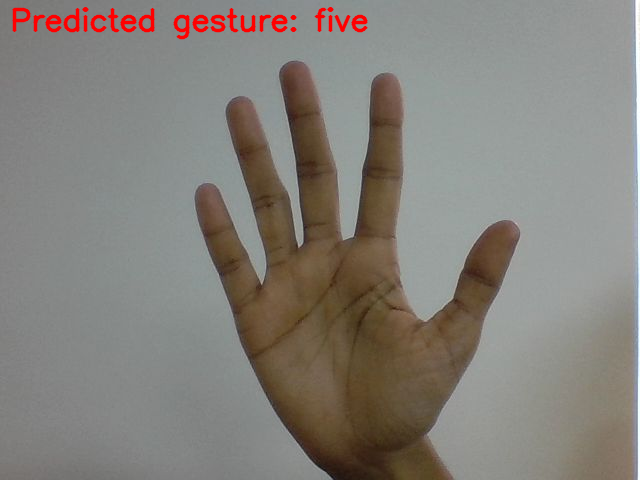

In [15]:


# Load the image
image_path = '/content/photo.jpg'
img = cv2.imread(image_path)

# Preprocess the image
img_array = cv2.resize(img, (224, 224))
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Map the predicted class to the corresponding gesture
gestures = ['eight', 'eleven_2', 'eleven_3', 'fifty_1', 'fifty_2', 'fifty_3', 'five', 'fourfourteen_2', 'fourteen_1', 'fourteen_3', 'nine', 'oneten_2eleven_1', 'seven', 'six', 'ten_1', 'ten_3', 'thirteen_1', 'thirteen_3', 'thirty_1', 'thirty_2', 'thirty_3', 'threethirteen_2', 'twenty_1','twenty_2','twenty_3', 'two','what','when_1','twenty_2','twenty_3','who','why']
predicted_gesture = gestures[predicted_class[0]]

# Create an output image with the predicted gesture
output_img = cv2.putText(img, f'Predicted gesture: {predicted_gesture}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

# Save the output image
cv2.imwrite('output.png', output_img)

# Display the output image
from IPython.display import Image
display(Image('output.png'))